In [253]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
%matplotlib inline
pd.options.display.max_columns = None

## Data

In [254]:
telco = pd.read_csv("telco_customer_churn.csv")
#first few rows
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [255]:
# Check unique values for each column
categorical_cols = telco.columns.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])
for col in categorical_cols:
    print(col)
    print(telco[col].unique(), "\n")

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn
['No' 'Yes'] 



In [256]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

### 1. Missing Values

Dataset contains 7043 data points and 21 columns. There no null values in the dataset, but _TotalCharges_ columns has wrong data type. Let's check if there's any string inside _TotalCharges_ column.

In [257]:
# check data non numeric on TotalCharges column
x = telco['TotalCharges']
str_count = 0
for i in x:
    try:
        a = float(i)
    except:
        print("String values = '{}'".format(i))
        str_count += 1
        
print("Total string: ", str_count)

String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
String values = ' '
Total string:  11


Replace these 11 missing values from `' '` to null values and drop any data points in dataset with null values.

In [258]:
# Replace ' ' to null valuess and drop data point with null values
telco["TotalCharges"] = telco["TotalCharges"].replace(' ', np.nan)
telco.dropna(inplace=True)

# Change TotalCharges column type to float
telco["TotalCharges"] = telco["TotalCharges"].astype(float)
telco = telco.reset_index()[telco.columns]
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 2. Check for outliers for numerical columns

In [259]:
num_cols = ["tenure", ""]

## Exploratory Data Analysis

### 1. Distribution data churn-not churn

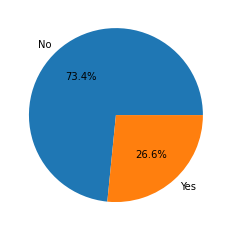

In [260]:
plt.pie(telco["Churn"].value_counts(),labels=telco["Churn"].unique(), autopct='%.1f%%')
plt.show()

Distribution data:
- Not-churn: 73.4%
- Churn: 26.6%

### 2. Customer Churn by Demographic

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

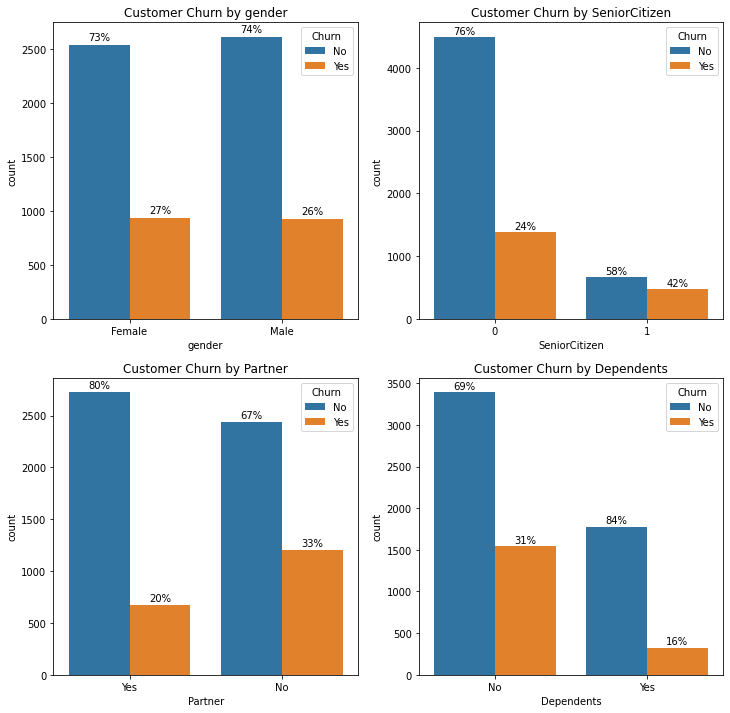

In [261]:
demographic_cols = ["gender", "SeniorCitizen", "Partner", "Dependents"]

labels = telco["gender"].value_counts().index.tolist()
values = telco["gender"].value_counts().values.tolist()

plt.figure(figsize=(12, 12))

for i in range(4):
    # plot the graph
    plt.subplot(2, 2, i+1)
    ax = sns.countplot(x=demographic_cols[i], hue="Churn", data=telco)
    plt.title("Customer Churn by " + demographic_cols[i])
    
    ## annotate text percent
    bars = ax.patches #4 bars
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height() # value non churn
        height_r = right.get_height() # get value churn
        total = height_l + height_r #total 2 bars
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center") #without decimal
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


- Gender tidak mempengaruhi customer churn rate
- Customer SeniorCitizen dan customer yang tidak memiliki Partner mempunyai kemungkinan lebih tinggi untuk berhenti berlangganan
- Customer yang memiliki Dependents dan Partner mempunyai kemungkinan lebih rendah untuk berhenti berlangganan

### 3. Customer Churn by Customer Account Information

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

In [262]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [263]:
#Change Tenure column to categorical
def tenure_categorical(telco):  
    if telco["tenure"] <= 12 :
        return "1-12"
    elif (telco["tenure"] > 12) & (telco["tenure"] <= 24 ):
        return "13-24"
    elif (telco["tenure"] > 24) & (telco["tenure"] <= 48) :
        return "25-48"
    elif (telco["tenure"] > 48) & (telco["tenure"] <= 60) :
        return "49-60"
    elif telco["tenure"] > 60 :
        return "61-72"
    
telco["tenure_group"] = telco.apply(lambda x: tenure_categorical(x), axis = 1)

In [264]:
cus_acc_info_cols = [
    "tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"
]

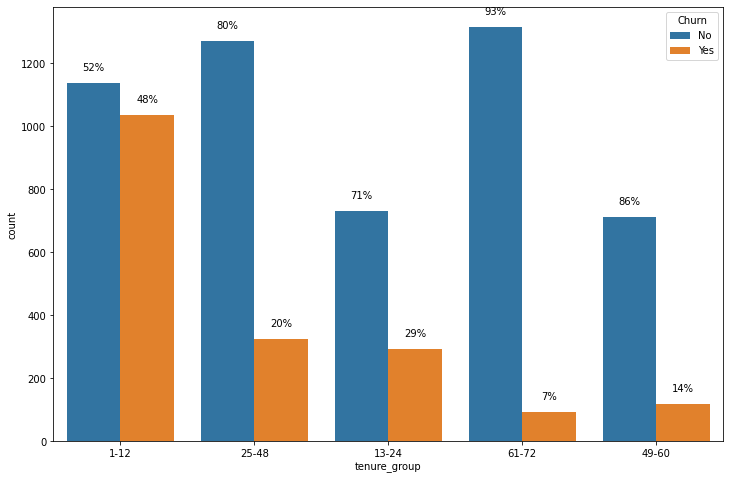

In [265]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='tenure_group', data=telco, hue='Churn')

## annotate text percent
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height() # value non churn
    height_r = right.get_height() # get value churn
    total = height_l + height_r #total 2 bars
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

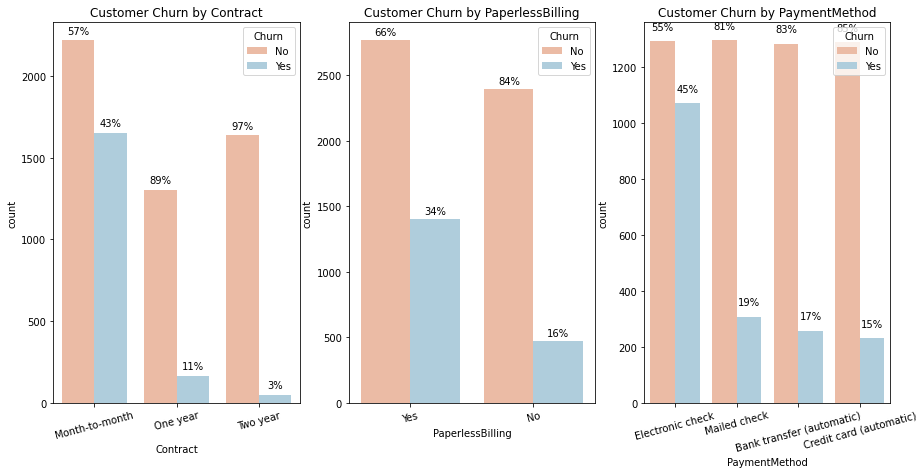

In [266]:
acc_info_cat = ["Contract", "PaperlessBilling", "PaymentMethod"]
acc_info_num = ["tenure", "MonthlyCharges", "TotalCharges"]

labels = telco["gender"].value_counts().index.tolist()
values = telco["gender"].value_counts().values.tolist()

plt.figure(figsize=(15, 7))

for i in range(3):
    # plot the graph
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(x=acc_info_cat[i], hue="Churn", data=telco, palette = "RdBu")
    plt.xticks(rotation=15)
    plt.title("Customer Churn by " + acc_info_cat[i])
    
    ## annotate text percent
    bars = ax.patches #4 bars
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height() # value non churn
        height_r = right.get_height() # get value churn
        total = height_l + height_r #total 2 bars
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center") #without decimal
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


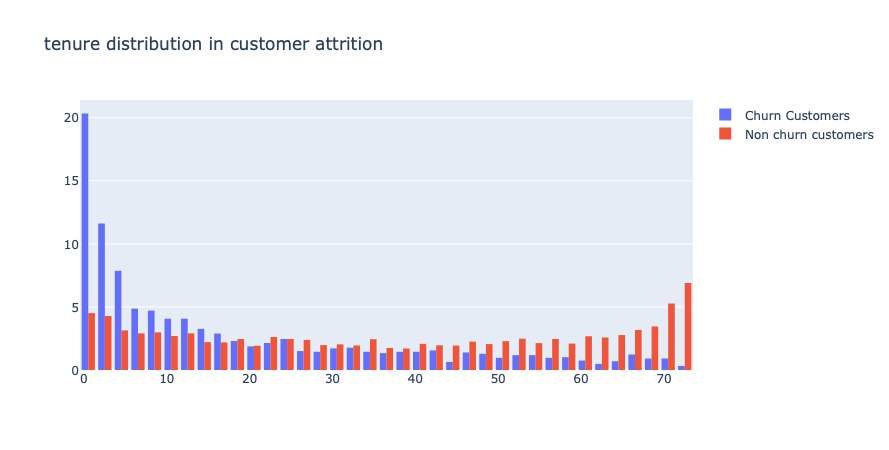

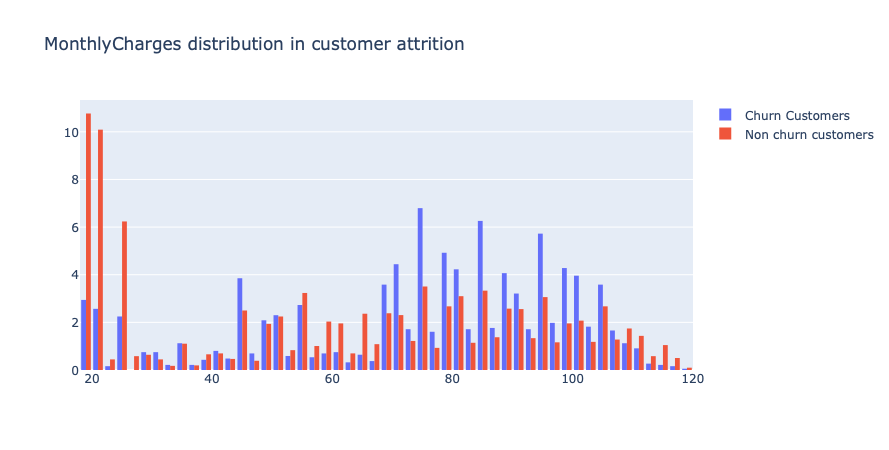

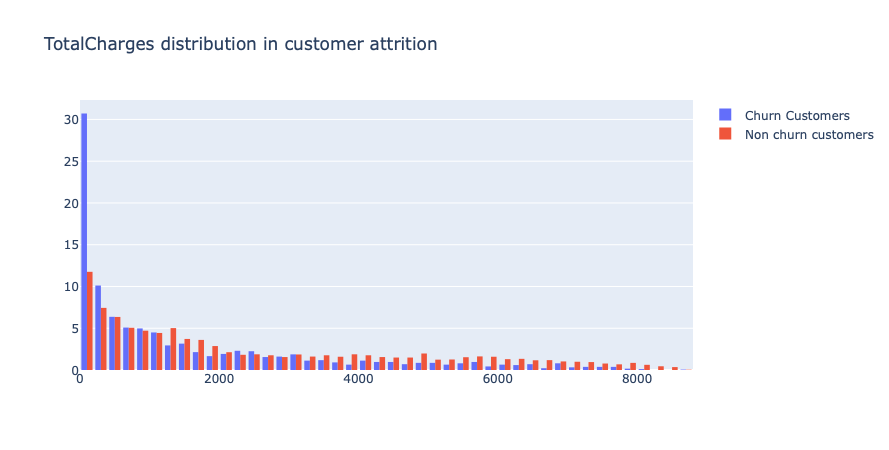

In [270]:
def histogram(column) :
    churn = telco[telco["Churn"] == "Yes"]
    not_churn = telco[telco["Churn"] == "No"]
    
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                         )
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                         )
    data = [trace1,trace2]
    layout = go.Layout(title = column + " distribution in customer attrition ")
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
for i in acc_info_num :
    histogram(i)